# <div class="alert alert-warning"> Problem Statement:
    
X education sales online courses to industry professionals.They get lot of leads but very few gets converted (say 30 %).Hence company wishes to identify hot leads. The ballpark of the target lead conversion rate given by CEO is around 80%.

# <div class="alert alert-warning"> Objective 
To build a model to find most potential leads, also known as ‘Hot Leads.<br/>
Deployment of model for future use. A higher score would mean that the lead is hot, i.e. is most likely to convert.<br/>
Whereas a lower score would mean that the lead is cold and will mostly not get converted

 ## <div class="alert alert-warning">  Steps :
- Import Libraries and Data.
- Understanding the Data & Data Cleaning 
- Data manipulation
- Exploratory Data Analysis 
- Dummy variables
- Features scaling ( if required)
- Model making using Logistic regression 
- Model Validation
- Model presentation 
- Conclusion and reccomendations 

####  <div class="alert alert-info"> Importing Libraries & Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

plt.style.use("ggplot")
import time, warnings
import datetime as dt

from IPython.display import display
pd.options.display.max_columns = None


from tabulate import tabulate 


import sidetable



In [2]:
# to table print  a dataframe 
def tab(ser) : 
        print(tabulate(pd.DataFrame(ser), headers='keys', tablefmt="psql"))

In [3]:
# Importing dataset

lead_df = pd.read_csv ('Leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Inspect the dataframe

lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Looking at the dataset we observed that following things need to be done:

- Encoding categorical variables
- Missing value handling
- Convert the Select into the NaN
- Dropping columns having more null values.

In [5]:
# Print shape of the dataframe

lead_df.shape

(9240, 37)

- This data set has a total of 9240 records ,each with 37 features.
- Each record represents the characteristics of a lead and whether the lead was converted.
- Converted column indicates whether the particular lead was converted to a client. This is our target variable.

####  <div class="alert alert-info"> Data cleaning and Data manipulation

 Handling Incorrect data types

In [6]:
# 'Converted' is a binary categorical variable but the info shows it is `int64`. Converting to `category` data type 
lead_df['Converted'] = lead_df['Converted'].astype('category')

In [7]:
# Print statistical values of the dataframe

lead_df.describe()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


Missing Value treatment

In [8]:
# Null values in each Column
nulls = pd.DataFrame(100*lead_df.isnull().sum()/lead_df.shape[0])
nulls.columns = ['Null Percentage']

# Sorting null percentages in descending order and highlighting null % > 45 
nulls[nulls['Null Percentage'] !=0].sort_values(by ='Null Percentage', ascending=False).style.applymap(lambda x : 'color : red' if x > 45 else '')

,Null Percentage
Lead Quality,51.590909
Asymmetrique Profile Score,45.649351
Asymmetrique Activity Score,45.649351
Asymmetrique Profile Index,45.649351
Asymmetrique Activity Index,45.649351
Tags,36.287879
Lead Profile,29.318182
What matters most to you in choosing a course,29.318182
What is your current occupation,29.112554
Country,26.634199


<AxesSubplot:xlabel='Lead Quality', ylabel='count'>

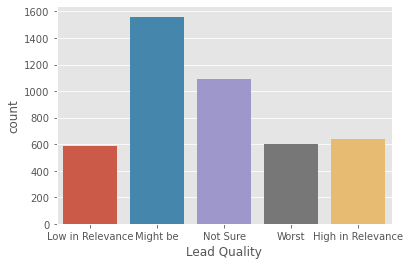

In [9]:
# Checking variables with very high % of missing values 
# Lead Quality: Indicates the quality of lead based on the data and intuition the the employee who has been 
#assigned to the lead. As Lead quality is based on the intution of employee.
sns.countplot(lead_df['Lead Quality'])

**Finding**
- Lead Quality have higher number of not sure and might be components.
- Even if we imput we need it imput it with mode which is might be. 
- Its not helping in any analysis and hence we will drop this column.

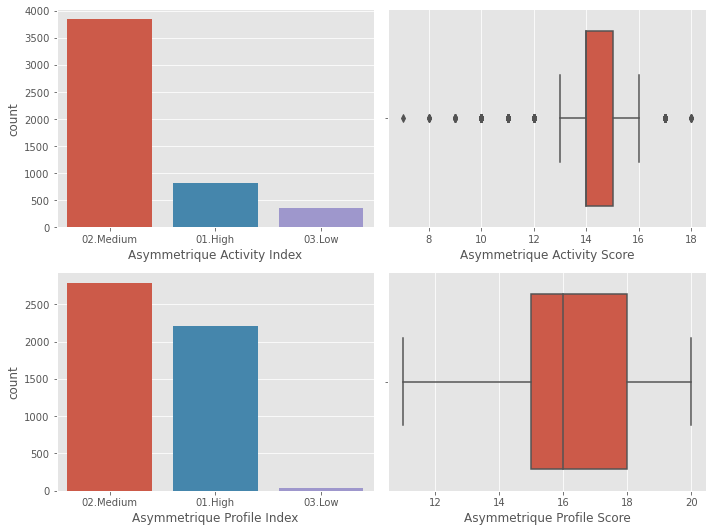

In [10]:
# Now will check variables having missing values approx 45% 
fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(lead_df['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(lead_df['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(lead_df['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(lead_df['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

**Finding**
- As we can see that percentage of missing values of the columns `Asymmetrique Activity Index`,      `Asymmetrique Profile Score,Asymmetrique Activity Score,Asymmetrique Profile Index`higher.
- Further, the data in these columns is filled by the sales team and the values depend heavily on the team's judgement. These columns are not good candidates for modelling since the values are subjective.
- So we will drop this columns.

In [11]:
# Dropping missing values of above columns
lead_df = lead_df.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score','Lead Quality'], axis=1)

In [12]:
# Lets check if any lead has been recorded twice by checking if there is any duplicate lead or Prospect ID. 
duplicate_prospect_ids = lead_df['Prospect ID'][lead_df['Prospect ID'].duplicated()].sum()
duplicate_lead_no = lead_df['Lead Number'][lead_df['Lead Number'].duplicated()].sum()
print('No of Duplicate Prospect IDs : ', duplicate_prospect_ids)
print('No of Duplicate Lead Nos : ', duplicate_lead_no)

No of Duplicate Prospect IDs :  0
No of Duplicate Lead Nos :  0


In [13]:
#dropping Lead Number and Prospect ID since they have all unique values and its not usefull for our analysis. 

lead_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [14]:
variablelist = ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the columns
lead_df[variablelist] = lead_df[variablelist].apply(binary_map)

In [15]:
# Rows Missing Target Variable 
print('Number of rows with missing Target Variable : ',lead_df['Converted'].isnull().sum())

Number of rows with missing Target Variable :  0


In [16]:
# Rows missing more than 50% of values 
highNullRowsCondition = lead_df.isnull().sum(axis=1)/lead_df.shape[1] > 0.5
lead_df[highNullRowsCondition].index

## This shows No rows missing more than 50% of values.

Int64Index([], dtype='int64')

#### Handling `Select` in variables
- Their are some columns which shows a value called select.
- This means customers has not selected any options for these columns.
- So we can impute those values to nan.

In [17]:
# Converting 'Select' values to NaN.
lead_df = lead_df.replace('Select', np.nan)

In [18]:
# Null values in each Column
nulls = pd.DataFrame(100*lead_df.isnull().sum()/lead_df.shape[0])
nulls.columns = ['Null Percentage']

# Sorting null percentages in descending order and highlighting null % > 45 
nulls[nulls['Null Percentage'] !=0].sort_values(by ='Null Percentage', ascending=False).style.applymap(lambda x : 'color : red' if x > 45 else '')

,Null Percentage
How did you hear about X Education,78.463203
Lead Profile,74.188312
City,39.707792
Specialization,36.580087
Tags,36.287879
What matters most to you in choosing a course,29.318182
What is your current occupation,29.112554
Country,26.634199
TotalVisits,1.482684
Page Views Per Visit,1.482684


Lead Profile & How did you hear about X Education have very high percentage of nulls. Let's drop these columns after EDA

In [19]:
# Checking if there are columns with one unique value since it won't affect our analysis
lead_df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [20]:
# Dropping unique valued columns
lead_df.drop(['Receive More Updates About Our Courses','Magazine','Get updates on DM Content'],1,inplace= True)

In [21]:
lead_df.drop(['Update me on Supply Chain Content','I agree to pay the amount through cheque'],1,inplace= True)

####  <div class="alert alert-info"> Exploratory Data Analysis 

In [22]:
# Categorical Attributes Analysis:
df_dim= lead_df.select_dtypes(exclude=['float64','int64','datetime64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    9240 non-null   object  
 1   Lead Source                                    9204 non-null   object  
 2   Converted                                      9240 non-null   category
 3   Last Activity                                  9137 non-null   object  
 4   Country                                        6779 non-null   object  
 5   Specialization                                 5860 non-null   object  
 6   How did you hear about X Education             1990 non-null   object  
 7   What is your current occupation                6550 non-null   object  
 8   What matters most to you in choosing a course  6531 non-null   object  
 9   Newspaper Article                        

In [23]:
# Checking the labels of the remaining categorical columns

for col in lead_df.iloc[:,1:].select_dtypes(include='object').columns:
    print(col)
    print("_________________________________________________________________________________________________")
    print(lead_df[col].value_counts(normalize= True))
    print("_________________________________________________________________________________________________")


Lead Source
_________________________________________________________________________________________________
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64
_________________________________________________________________________________________________
Last Activity
_________________________________________________________________________________________________
Email Opened    

- For categorical features, missing values could be imputed by the most frequently occuring label i.e MODE value, since this is the most representative metric of a categorical feature.
- For continuous features, if there are outliers, the most representative metric of the feature's distribution is MEDIAN, else it is MEAN. Continuous feature imputations are thus dependent on presence of outliers.

In [24]:
# We can impute the MUMBAI into all the NULLs as most of the values belong to MUMBAI
lead_df['City'] = lead_df['City'].replace(np.nan, 'Mumbai')

# Since there is no significant difference among top 3 specialisation , hence it will be safer to impute NaN with Others
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'Other_Specialization')

# For Tags column, more than 30% data is for "Will revert after reading the email" and hence we can impute NULLS with Will revert after reading the email
lead_df['Tags'] = lead_df['Tags'].replace(np.nan, 'Will revert after reading the email')
# More than 99% data is of "Better Career Prospects" and hence it is safer to impute NULLS with this value
lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

# More than 85% data is of "Unemployed" and hence it is safer to impute NULLS with this value
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan, 'Unemployed')

# More than 95% data is of "India" and hence it is safer to impute NULLS with this value
lead_df['Country'] = lead_df['Country'].replace(np.nan, 'India')

In [25]:
# Lets start with the target variable and see if we have any data imbalance or not 
lead_df["Converted"].value_counts(normalize=True)
# We have good representation of both the classes of data and hence we are good to go with the further analysis
#" '0' is not converted and '1' is converted"

0    0.61461
1    0.38539
Name: Converted, dtype: float64

### Relation between Categorical variable to Converted variable

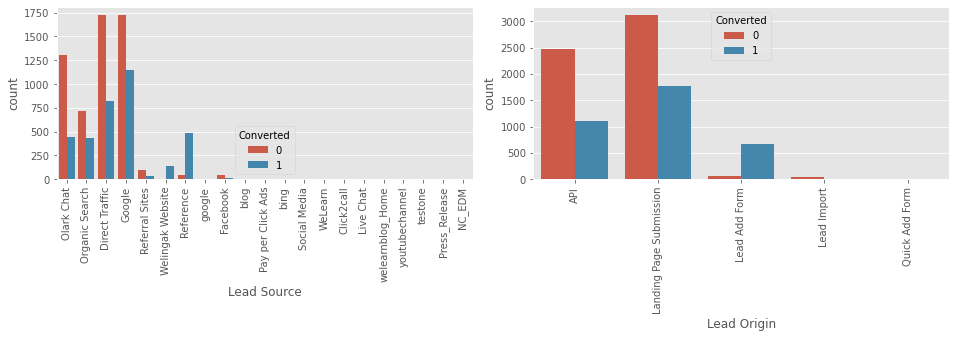

In [26]:
# Now doing EDA on Categorical values 

fig=plt.subplots(figsize=(20, 12))

for i, feature in enumerate(['Lead Source', 'Lead Origin']):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(lead_df[feature], hue=lead_df["Converted"])
    plt.xticks(rotation=90)
    plt.tight_layout()

In [27]:
# We can clearly observe that the count of leads from various sources are close to negligible. 
# Hence we can club them into "Others" source for better visualisation and analysis
# Also there is mergening google and Google together its the same source.

lead_df['Lead Source'] = lead_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other_Lead_Source')


In [28]:
# Looking at labels in each Categorical Variable to check for incorrect labels. 
df_dim = lead_df.dtypes[lead_df.dtypes == 'object'].index.values
print('Categorical Features : ', df_dim,'\n\n')
for feature in df_dim : 
    print('Levels in ',feature,' are ' , lead_df[feature].unique(),'\n\n')

Categorical Features :  ['Lead Origin' 'Lead Source' 'Last Activity' 'Country' 'Specialization'
 'How did you hear about X Education' 'What is your current occupation'
 'What matters most to you in choosing a course' 'Newspaper Article'
 'X Education Forums' 'Newspaper' 'Tags' 'Lead Profile' 'City'
 'Last Notable Activity'] 


Levels in  Lead Origin  are  ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form'] 


Levels in  Lead Source  are  ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan
 'Other_Lead_Source'] 


Levels in  Last Activity  are  ['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' nan
 'Approached upfront' 'SMS Sent' 'Visited Booth in Tradeshow'
 'Resubscribed to emails' 'Email 

From above,we can clearly see that Google is appearing twice in 'Lead Source'- (Google,google)

In [29]:
lead_df['Lead Source'] = lead_df['Lead Source'].replace("google", 'Google')

#### Findings:-

`For Lead Origin`
- API and Landing Page Submission has less conversion rate but counts of the leads from them are high in numbers so lets not ignore them.
- The count of leads from the Lead Add Form is pretty low but the conversion rate is very high
- Lead Import has very less count as well as conversion rate and hence can be ignored
- To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'API' and 'Landing Page Submission' and also increasing the number of leads from 'Lead Add Form'

`For Lead Source` 
- The count of leads from the Google and Direct Traffic is maximum
- The conversion rate of the leads from Reference and Welingak Website is maximum
- To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'Google', 'Olark Chat', 'Organic Search', 'Direct Traffic' and also increasing the number of leads from 'Reference' and 'Welingak Website'

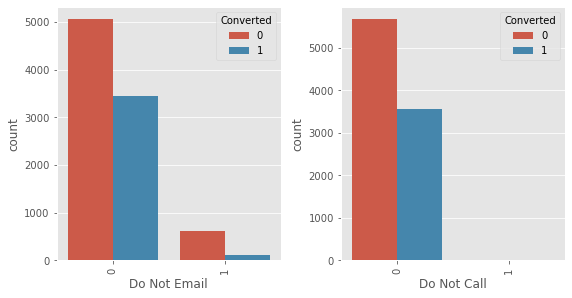

In [30]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['Do Not Email', 'Do Not Call']):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(lead_df[feature], hue=lead_df["Converted"])
    plt.xticks(rotation=90)
    plt.tight_layout()

#### Findings:-
`Do Not Email`<br/>
- We see people advising to not to email have very low conversion ratio. 
- It shows that mostly people are reached out by email and the conversion ratio is high.

`Do Not Call`<br/>
- We can see from the graph that mostly people are getting contacted by phone and they have high conversion ratio too. 
- Mostly people prefer to get calls.

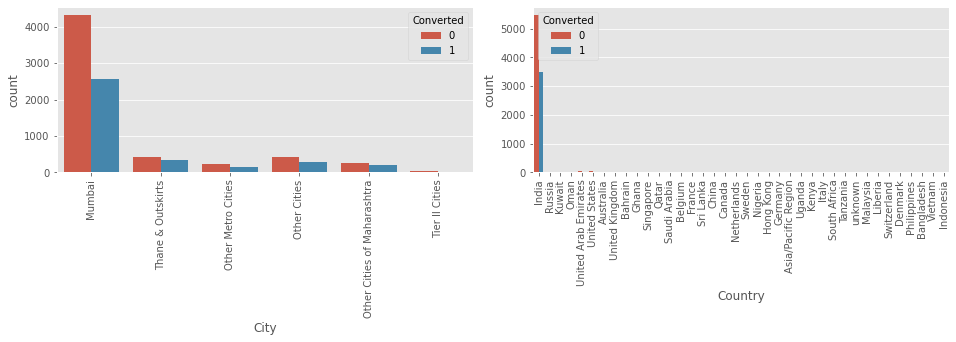

In [31]:
fig=plt.subplots(figsize=(20, 12))

for i, feature in enumerate(['City', 'Country']):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 3.0)
    sns.countplot(lead_df[feature], hue=lead_df["Converted"])
    plt.xticks(rotation=90)
    plt.tight_layout()

#### Findings:-
`City` <br/>
- Mostly the reachout has been made to people from Mumbai and they have very high conversion ratio. However for all other cities too except Tier 2 cities  the ratio of leads converted are higher than not converted.We can ignore tier 2 cities.

`Country`  <br/>
- Mostly reachout have been made to people from Country India and few to UAE and United states. In all, converted leads are more than total leads.

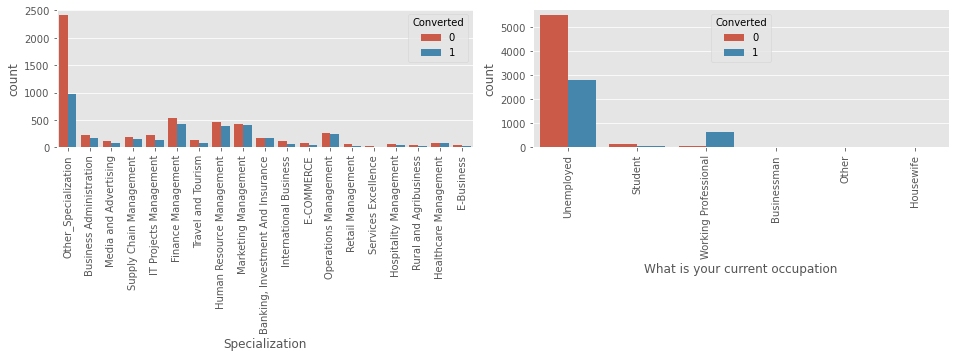

In [32]:
fig=plt.subplots(figsize=(20, 12))
for i, feature in enumerate(['Specialization', 'What is your current occupation']):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 3.0)
    sns.countplot(lead_df[feature], hue=lead_df["Converted"])
    plt.xticks(rotation=90)
    plt.tight_layout()

In [33]:
#combining Management Specializations because they show similar trends

lead_df['Specialization'] = lead_df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')

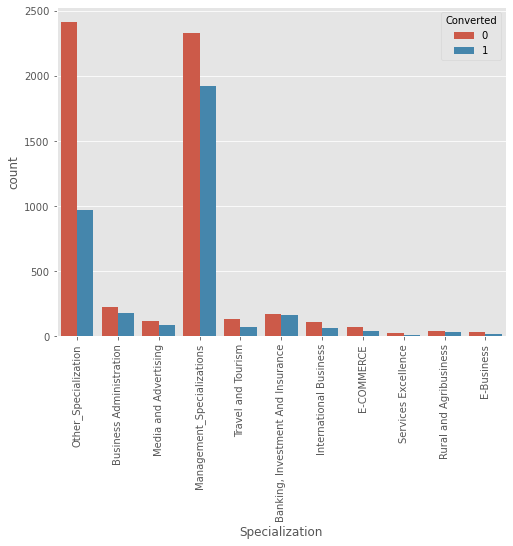

In [34]:
fig=plt.subplots(figsize=(20, 20))

for i, feature in enumerate(['Specialization']):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 3.0)
    sns.countplot(lead_df[feature], hue=lead_df["Converted"])
    plt.xticks(rotation=90)
    plt.tight_layout()

#### Findings:-
`Specialisation` <br/>
- We combined  Management Specializations because they show similar trends. 
- Now we can see that people having managment specilizations and other specialization have highest enquiries.Managment specialization highest lead conversion.Then second is other specialisation. 
- For E business whicherver enquiries recieved got converted. 
- For Services Excellence there was no conversation so we can ignore. 
- For others conversion ratio is low we need to aim at increasing this. 

`Current occupation` <br/>
- Highest conversion is of working professionals.
- The number of enquiries from unemployed are most. 
- To increase overall conversion rate, we need to increase the number of Working Professional leads. - Also we should work  on increasing the conversion rate of Unemployed leads.

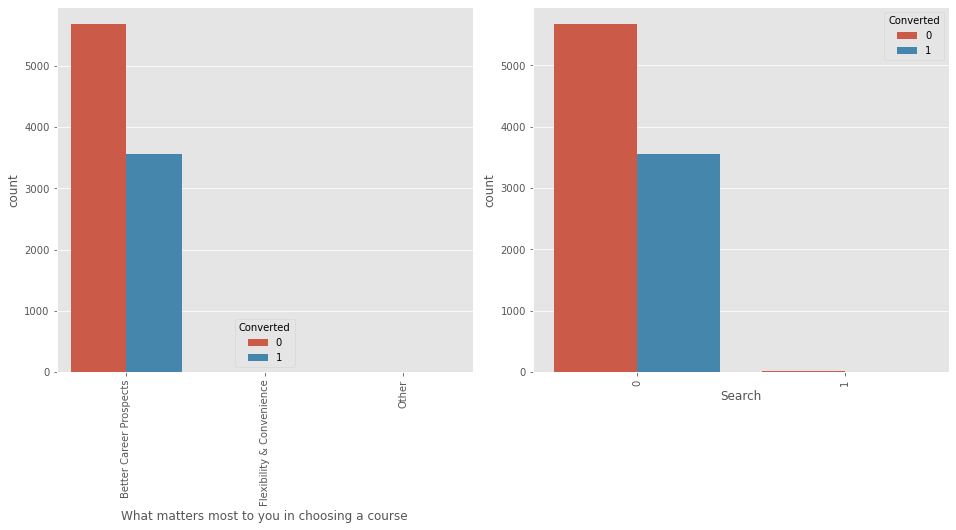

In [35]:
fig=plt.subplots(figsize=(20, 20))
for i, feature in enumerate(['What matters most to you in choosing a course', 'Search']):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 3.0)
    sns.countplot(lead_df[feature], hue=lead_df["Converted"])
    plt.xticks(rotation=90)
    plt.tight_layout()

#### Findings:-
`Reason to choose a course`
- No of enquiries by prospects opting for courses for better career prospects is very high. 
- We need to concentrate on having better conversion in this segment.<br/>

`Search` 
- No of enquiries in random search by prospects is more but conversion is low. 
- We need to focus on increasing conversion.

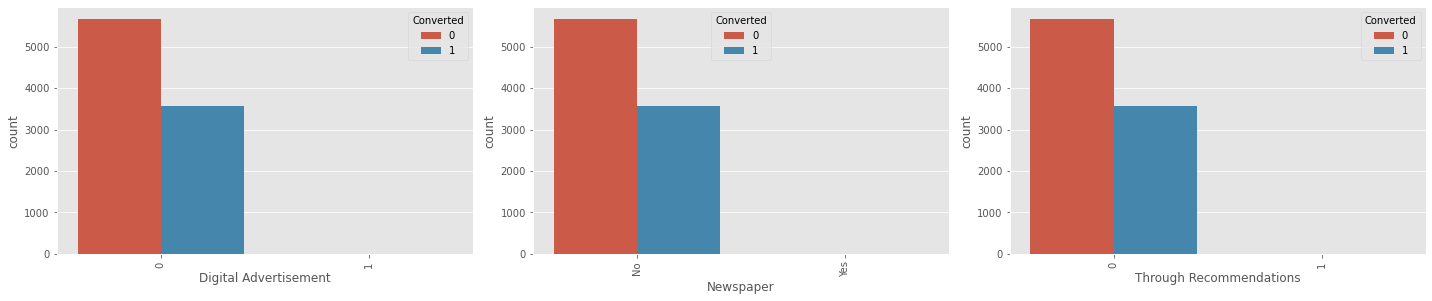

In [36]:
fig=plt.subplots(figsize=(20, 12))
for i, feature in enumerate(['Digital Advertisement', 'Newspaper','Through Recommendations']):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 3.0)
    sns.countplot(lead_df[feature], hue=lead_df["Converted"])
    plt.xticks(rotation=90)
    plt.tight_layout()

#### Findings:-
- The number of enquiries from `Digital advt ,newspaper` and `recommendations` are high but conversion is low comparitively.

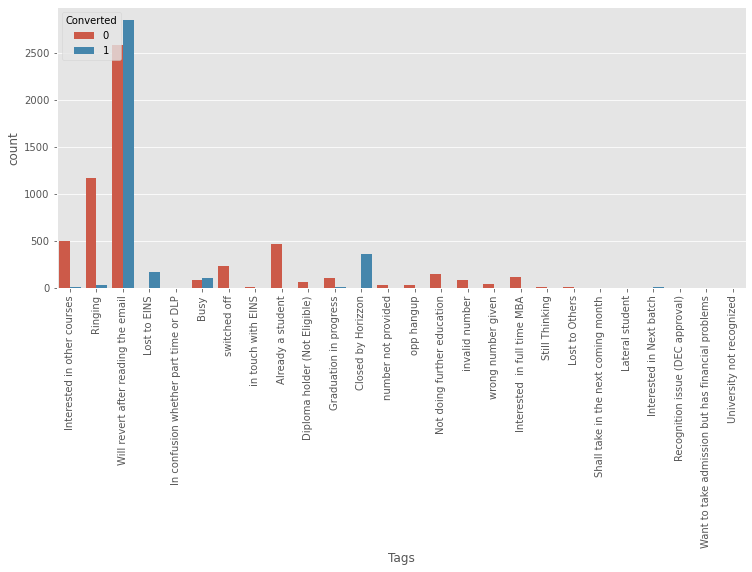

In [37]:
fig=plt.subplots(figsize=(30, 20))
for i, feature in enumerate(['Tags']):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 3.0)
    sns.countplot(lead_df[feature], hue=lead_df["Converted"])
    plt.xticks(rotation=90)
    plt.tight_layout()

#### Findings:-
`'Will revert after reading the email'` and `'Closed by Horizzon'` have high conversion rate.`'Lost to EINS'` & `'closed by Horizon'` have very good conversion rate. 

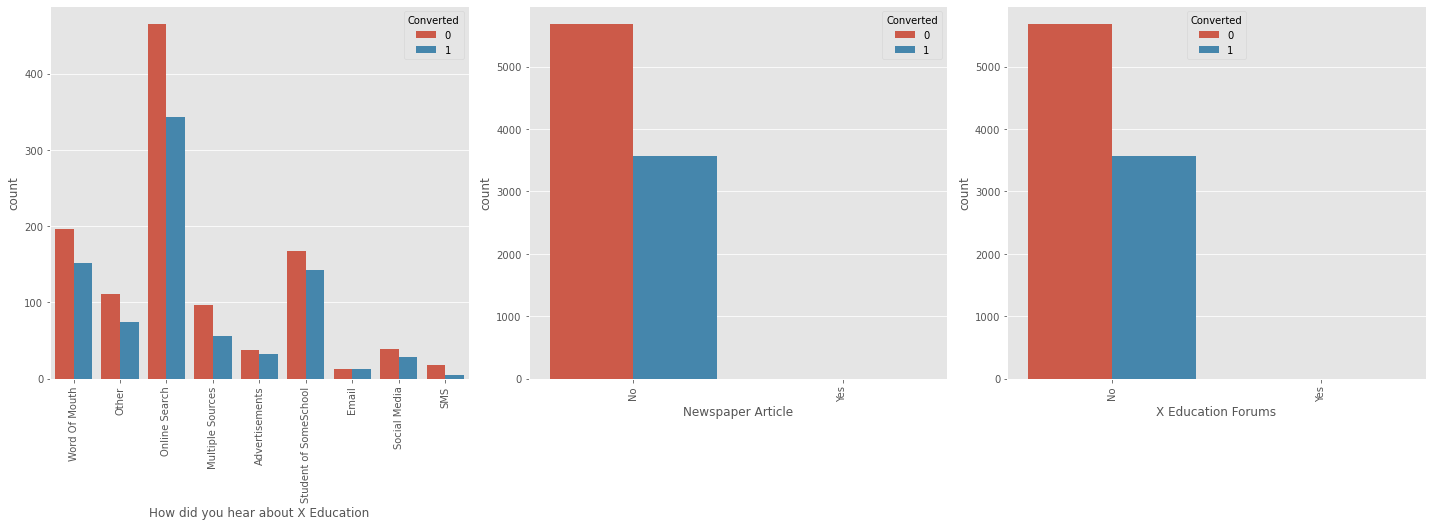

In [38]:
fig=plt.subplots(figsize=(20, 20))
for i, feature in enumerate(['How did you hear about X Education', 'Newspaper Article','X Education Forums']):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 3.0)
    sns.countplot(lead_df[feature], hue=lead_df["Converted"])
    plt.xticks(rotation=90)
    plt.tight_layout()

#### Findings:-
- Highest number of enquiries coming from prospects doing online search and then word of mouth ,same school students. 
- Highest conversion is from online enquiries buts it still low when compared to number of enquiries we got.So we need to make out website more catchy. 
- We also need to give empasis of referral benefits so that leads by word of mouth or same school collegues.
- No of conversions from enquries after seeing advertisement in Newspaper article and X education Forums is high but conversion is low so we need to focus on increasing it. 

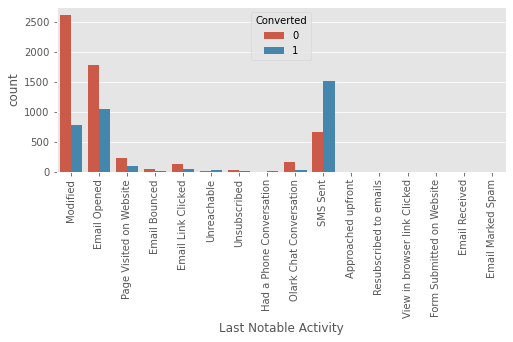

In [39]:
fig=plt.subplots(figsize=(20, 12))
for i, feature in enumerate(['Last Notable Activity']):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 3.0)
    sns.countplot(lead_df[feature], hue=lead_df["Converted"])
    plt.xticks(rotation=90)
    plt.tight_layout()

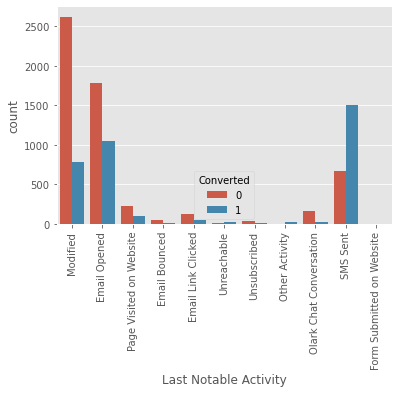

In [40]:
lead_df['Last Notable Activity'] = lead_df['Last Notable Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 'Visited Booth in Tradeshow', 'Approached upfront','Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')
# lets plot the Last Activity again 
sns.countplot(x="Last Notable Activity", hue="Converted", data= lead_df)
plt.xticks( rotation='vertical')
plt.show()

#### Findings:-
- We should focus on increasing the conversion rate of those having last activity as Email Opened,Modified to those leads and also try to increase the count of the ones having last activity as SMS sent.

In [41]:
#Checking outliers 
numeric = lead_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9240.000000,9103.000000
mean,3.445238,487.698268,2.362820
std,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
99%,17.000000,1840.610000,9.000000
max,251.000000,2272.000000,55.000000


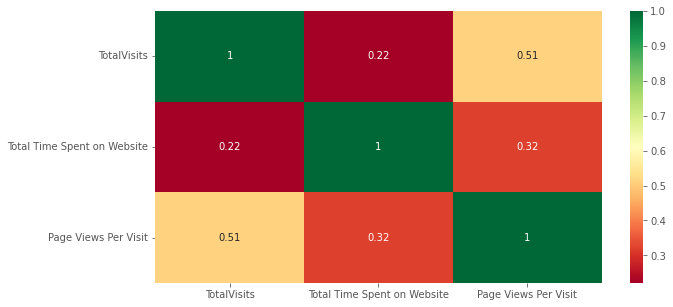

In [42]:
plt.figure(figsize=(10,5))
sns.heatmap(numeric.corr(), annot = True, cmap="RdYlGn")
plt.show()

From above heat map it shows there is higher correlation between Page Views per Visit and TotolVisits.

In [43]:
# Let's check shape of the dataframe:
lead_df.shape

(9240, 25)

**Handling Outliers**

In [44]:
# Checking outliers at 25%,50%,75%,90%,95% and above
lead_df.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.000216,3.445238,487.698268,2.362820,0.001515,0.000433,0.000758,0.312554
std,0.270435,0.014711,4.854853,548.021466,2.161418,0.038898,0.020803,0.027515,0.463559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,5.000000,936.000000,3.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,1.000000,1.000000,1.000000


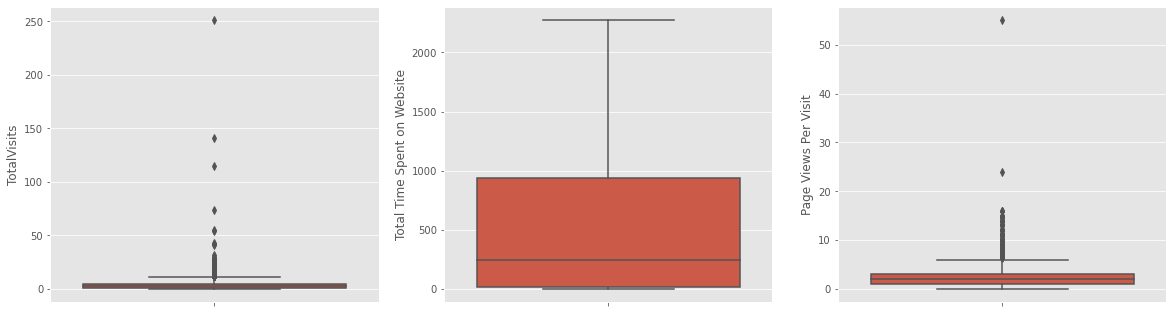

In [45]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', data = lead_df)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', data = lead_df)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', data = lead_df)
plt.show()

In [46]:
# Removing values beyond 99% for Total Visits

nn_quartile_total_visits = lead_df['TotalVisits'].quantile(0.99)
lead_df = lead_df[lead_df["TotalVisits"] < nn_quartile_total_visits]
lead_df["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9004.000000
mean        3.182474
std         2.935631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [47]:
# Checking outliers at 25%,50%,75%,90%,95% and above

lead_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
count,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000
mean,0.078299,0.000222,3.182474,479.631941,2.334519,0.001444,0.000333,0.000666,0.313972
std,0.268656,0.014903,2.935631,544.845091,2.061779,0.037972,0.018251,0.025807,0.464131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,242.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,5.000000,915.250000,3.000000,0.000000,0.000000,0.000000,1.000000
90%,0.000000,0.000000,7.000000,1371.000000,5.000000,0.000000,0.000000,0.000000,1.000000
95%,1.000000,0.000000,9.000000,1554.850000,6.000000,0.000000,0.000000,0.000000,1.000000
99%,1.000000,0.000000,13.000000,1836.940000,9.000000,0.000000,0.000000,0.000000,1.000000


In [48]:
# Removing values beyond 99% for page Views Per Visit

nn_quartile_page_visits = lead_df['Page Views Per Visit'].quantile(0.99)
lead_df = lead_df[lead_df["Page Views Per Visit"] < nn_quartile_page_visits]
lead_df["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    8892.000000
mean        2.229871
std         1.837171
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [49]:
# Checking outliers at 25%,50%,75%,90%,95% and above
lead_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
count,8892.000000,8892.000000,8892.000000,8892.000000,8892.000000,8892.000000,8892.000000,8892.000000,8892.000000
mean,0.077823,0.000225,3.088507,476.563878,2.229871,0.001462,0.000225,0.000675,0.310391
std,0.267908,0.014997,2.822722,544.325819,1.837171,0.038210,0.014997,0.025969,0.462680
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,3.750000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,239.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,4.000000,908.250000,3.000000,0.000000,0.000000,0.000000,1.000000
90%,0.000000,0.000000,7.000000,1370.000000,5.000000,0.000000,0.000000,0.000000,1.000000
95%,1.000000,0.000000,8.000000,1553.000000,6.000000,0.000000,0.000000,0.000000,1.000000
99%,1.000000,0.000000,13.000000,1837.180000,7.000000,0.000000,0.000000,0.000000,1.000000


In [50]:
# Null values in each Column
nulls = pd.DataFrame(100*lead_df.isnull().sum()/lead_df.shape[0])
nulls.columns = ['Null Percentage']

# Sorting null percentages in descending order and highlighting null % > 45 
nulls[nulls['Null Percentage'] !=0].sort_values(by ='Null Percentage', ascending=False).style.applymap(lambda x : 'color : red' if x > 45 else '')

,Null Percentage
How did you hear about X Education,78.137652
Lead Profile,74.448943
Lead Source,0.326136


In [51]:
#Cross refering to note mentioned after output 17
lead_df.drop(columns=['Lead Profile','How did you hear about X Education'],inplace=True)

In [52]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2).sort_values(ascending=False)

Lead Source                                      0.33
Lead Origin                                      0.00
What matters most to you in choosing a course    0.00
A free copy of Mastering The Interview           0.00
City                                             0.00
Tags                                             0.00
Through Recommendations                          0.00
Digital Advertisement                            0.00
Newspaper                                        0.00
X Education Forums                               0.00
Newspaper Article                                0.00
Search                                           0.00
What is your current occupation                  0.00
Specialization                                   0.00
Country                                          0.00
Last Activity                                    0.00
Page Views Per Visit                             0.00
Total Time Spent on Website                      0.00
TotalVisits                 

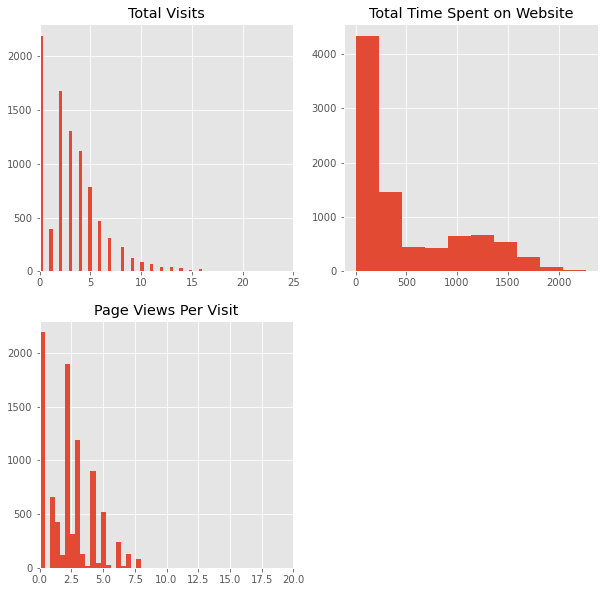

In [53]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(lead_df['TotalVisits'], bins = 50)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(lead_df['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(lead_df['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()


The conversion rated were high for `Total Visits`, `Total Time Spent on Website` and `Page Views Per Visit`.

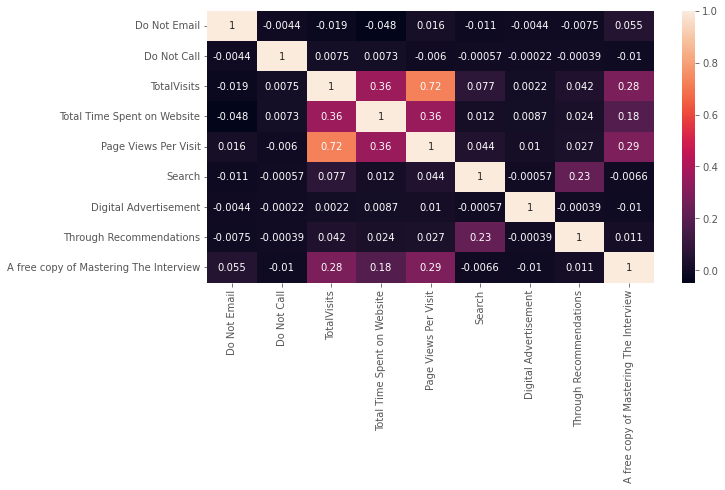

In [54]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(lead_df.corr(),annot=True)
plt.show()

**Findings**
- From the above heat map it is observed that there are many features having less data.
- So it will be not relevance to our further analysis.

In [55]:
lead_df.nunique()

Lead Origin                                         4
Lead Source                                         9
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        17
Total Time Spent on Website                      1702
Page Views Per Visit                               57
Last Activity                                      17
Country                                            38
Specialization                                     11
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   1
X Education Forums                                  1
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations     

In [56]:
# Dropping X Education Forum column & Newspaper Article as it has now unique values 

lead_df = lead_df.drop(['X Education Forums'], axis=1)
lead_df = lead_df.drop(['Newspaper Article'], axis=1)

In [57]:
lead_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [58]:
# Dropping columns which are now not usefull for further analysis after EDA

lead_df = lead_df.drop (['Country','What matters most to you in choosing a course','Newspaper','City','Tags','Search','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview','Do Not Email','Do Not Call'],1)

lead_df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Modified


####  Retained Data

In [59]:
# Columns retained 
print('Retained Columns\n\n', lead_df.columns.values)

Retained Columns

 ['Lead Origin' 'Lead Source' 'Converted' 'TotalVisits'
 'Total Time Spent on Website' 'Page Views Per Visit' 'Last Activity'
 'Specialization' 'What is your current occupation'
 'Last Notable Activity']


In [60]:
# Retained rows
print('Retained rows : ',lead_df.shape[0]) 
print("Ratio of retained rows", 100*lead_df.shape[0]/9240)

Retained rows :  8892
Ratio of retained rows 96.23376623376623


In [61]:
def categoricalUAn(column,figsize=[8,8]) : 
    
    ''' Function for categorical univariate analysis '''
    print('Types of ' + column)
    tab(lead_df.stb.freq([column]))
    
    converted = lead_df[lead_df['Converted'] == 1]
    unconverted = lead_df[lead_df['Converted'] == 0]
      
    print(column + ' for Converted Leads')
    
    tab(converted.stb.freq([column]))
    
    print(column + ' for Un-Converted Leads')
    
    tab(unconverted.stb.freq([column]))
    
    print(column + ' vs Conversion Rate')
    
    tab((converted[column].value_counts()) / (converted[column].value_counts() + unconverted[column].value_counts()))
    
    # bar plot
    plt.figure(figsize=figsize)
    ax = sns.countplot(y=column,hue='Converted',data=lead_df)
    title = column + ' vs Lead Conversion'
    ax.set(title= title)

Types of Lead Origin
+----+-------------------------+---------+-----------+--------------------+----------------------+
|    | Lead Origin             |   count |   percent |   cumulative_count |   cumulative_percent |
|----+-------------------------+---------+-----------+--------------------+----------------------|
|  0 | Landing Page Submission |    4716 | 53.0364   |               4716 |              53.0364 |
|  1 | API                     |    3538 | 39.7886   |               8254 |              92.825  |
|  2 | Lead Add Form           |     607 |  6.82636  |               8861 |              99.6514 |
|  3 | Lead Import             |      31 |  0.348628 |               8892 |             100      |
+----+-------------------------+---------+-----------+--------------------+----------------------+
Lead Origin for Converted Leads
+----+-------------------------+---------+-----------+--------------------+----------------------+
|    | Lead Origin             |   count |   percent |  

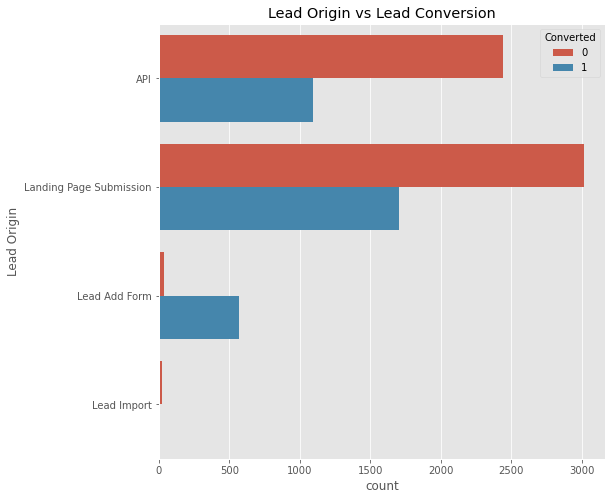

In [62]:
column = 'Lead Origin'
categoricalUAn(column,figsize=[8,8])

- Leads from Landing Page Submission followed by API make up 93% of all leads.
- But it is interesting that 8.3% of leads coming from other sources have the highest conversion rate of 87.5%

Types of Lead Source
+----+-------------------+---------+-----------+--------------------+----------------------+
|    | Lead Source       |   count |   percent |   cumulative_count |   cumulative_percent |
|----+-------------------+---------+-----------+--------------------+----------------------|
|  0 | Google            |    2828 | 31.9079   |               2828 |              31.9079 |
|  1 | Direct Traffic    |    2480 | 27.9815   |               5308 |              59.8894 |
|  2 | Olark Chat        |    1749 | 19.7337   |               7057 |              79.6232 |
|  3 | Organic Search    |    1069 | 12.0614   |               8126 |              91.6845 |
|  4 | Reference         |     442 |  4.98702  |               8568 |              96.6716 |
|  5 | Welingak Website  |     129 |  1.45549  |               8697 |              98.127  |
|  6 | Referral Sites    |     113 |  1.27496  |               8810 |              99.402  |
|  7 | Facebook          |      31 |  0.349769 | 

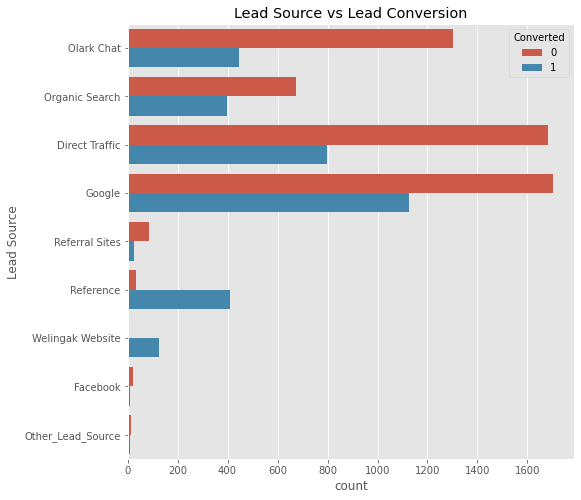

In [63]:
column = 'Lead Source'
categoricalUAn(column,figsize=[8,8])

- Most leads that get converted come from Google(31%), followed by Direct Traffic(28%) and Olark Chat(19%)
- And leads through Reference have a very high conversion rate (91%)

Types of Last Activity
+----+------------------------------+---------+------------+--------------------+----------------------+
|    | Last Activity                |   count |    percent |   cumulative_count |   cumulative_percent |
|----+------------------------------+---------+------------+--------------------+----------------------|
|  0 | Email Opened                 |    3367 | 37.8655    |               3367 |              37.8655 |
|  1 | SMS Sent                     |    2679 | 30.1282    |               6046 |              67.9937 |
|  2 | Olark Chat Conversation      |     963 | 10.83      |               7009 |              78.8237 |
|  3 | Page Visited on Website      |     585 |  6.57895   |               7594 |              85.4026 |
|  4 | Converted to Lead            |     427 |  4.80207   |               8021 |              90.2047 |
|  5 | Email Bounced                |     309 |  3.47503   |               8330 |              93.6797 |
|  6 | Email Link Clicked       

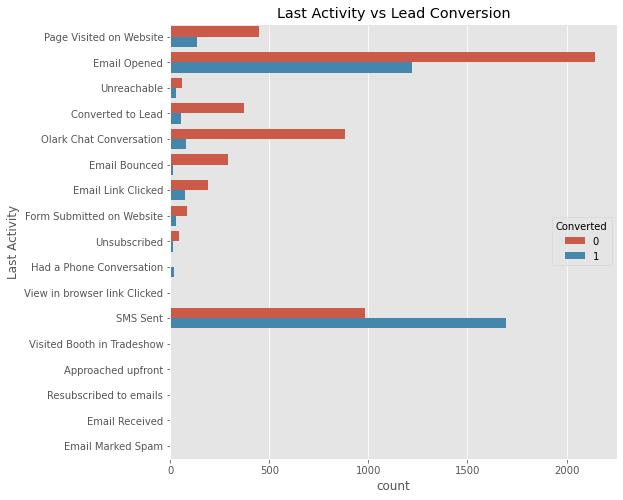

In [64]:
feature = 'Last Activity'
categoricalUAn(feature,figsize=[8,8])

- Most leads open emails sent to them (38%) and that's their last activity.
- Among those leads who's last activity is opening emails, 37% are converted.
- Only 4% of last activity indicators show Converted to Lead
- Last activiy as 'SMS Sent' has highest conversion rate (62%).
- Last activiy as 'Email Bounced' has lowest conversion rate (7.9%).

Types of Specialization
+----+-----------------------------------+---------+-----------+--------------------+----------------------+
|    | Specialization                    |   count |   percent |   cumulative_count |   cumulative_percent |
|----+-----------------------------------+---------+-----------+--------------------+----------------------|
|  0 | Management_Specializations        |    4090 | 45.9964   |               4090 |              45.9964 |
|  1 | Other_Specialization              |    3276 | 36.8421   |               7366 |              82.8385 |
|  2 | Business Administration           |     388 |  4.36347  |               7754 |              87.202  |
|  3 | Banking, Investment And Insurance |     319 |  3.58749  |               8073 |              90.7895 |
|  4 | Media and Advertising             |     195 |  2.19298  |               8268 |              92.9825 |
|  5 | Travel and Tourism                |     187 |  2.10301  |               8455 |              95.08

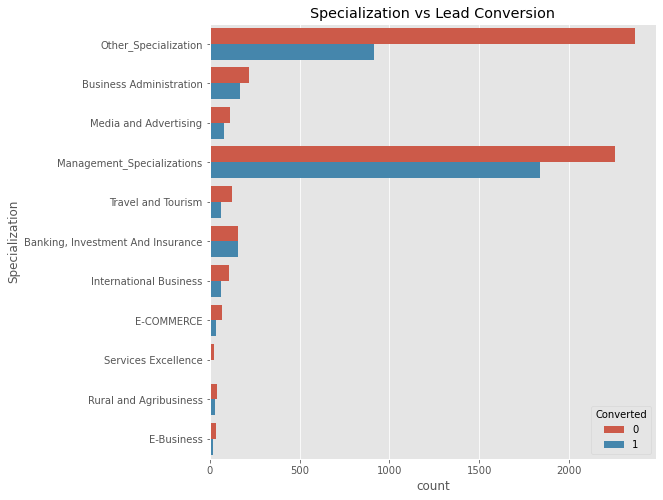

In [65]:
feature = 'Specialization'
categoricalUAn(feature)

- Specialization of 36% of leads is missing.
- We have mapped those missing values with 'No Specialization'.There might be two reason for this,
         Lead might be a fresher.
         Lead missed to fill it.
- Among all the specializations, ' Banking, Investment And Insurance' has the highest conversion rate(48.9%).

Types of What is your current occupation
+----+-----------------------------------+---------+------------+--------------------+----------------------+
|    | What is your current occupation   |   count |    percent |   cumulative_count |   cumulative_percent |
|----+-----------------------------------+---------+------------+--------------------+----------------------|
|  0 | Unemployed                        |    7998 | 89.946     |               7998 |              89.946  |
|  1 | Working Professional              |     662 |  7.44489   |               8660 |              97.3909 |
|  2 | Student                           |     203 |  2.28295   |               8863 |              99.6739 |
|  3 | Other                             |      13 |  0.146199  |               8876 |              99.8201 |
|  4 | Housewife                         |       9 |  0.101215  |               8885 |              99.9213 |
|  5 | Businessman                       |       7 |  0.0787224 |              

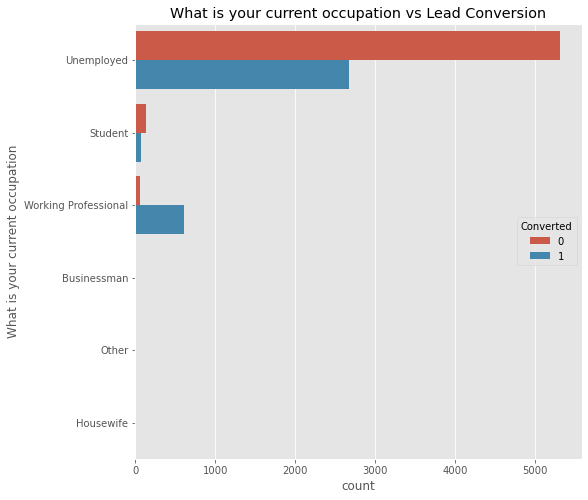

In [66]:
feature = 'What is your current occupation'
categoricalUAn(feature,figsize=[8,8])

- Although the conversion rate for Working Professional is the highest ! 91.6%, they only make 7.4% of all leads. 
- 60% leads are Unemployed customers followed by 29% with unknown nature of employment
- Among all the converted leads, Unemployed and Working Professionals top the list.
- Conversion for Housewife segment is 100%

<div class="alert alert-warning"> Last Notable Activity & Last Activity seem to have similar descriptions.From the data, Last Notable Activity seems like a column derived by the sales team using Last Activity. Since this insight might not be available for a new lead, we  looked at the possibility of dropping Last Notable Activity.However when we tried dropping the Last Notable Activity along with its dummies, the model was overfitting.Hence we didnt remove it.Though they seem to be similar there are few categories in each variable which are different from categories in another variable.e.g.Modified,Form Submitted on Website,View in browser link Clicked.So we let the two variables be as is.

In [67]:
lead_df

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.00,Page Visited on Website,Other_Specialization,Unemployed,Modified
1,API,Organic Search,0,5.0,674,2.50,Email Opened,Other_Specialization,Unemployed,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.00,Converted to Lead,Other_Specialization,Unemployed,Modified
...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,8.0,1845,2.67,Email Marked Spam,Management_Specializations,Unemployed,Other Activity
9236,Landing Page Submission,Direct Traffic,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,SMS Sent
9237,Landing Page Submission,Direct Traffic,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,SMS Sent
9238,Landing Page Submission,Google,1,3.0,499,3.00,SMS Sent,Management_Specializations,Unemployed,SMS Sent


####  <div class="alert alert-info"> Data Preparation

In [68]:
#getting a list of categorical columns
lead_df.select_dtypes(include=['object']).columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Last Notable Activity'],
      dtype='object')

In [69]:
# Create a dataset with all the variables which needs dummy data creation
lead_dummy=lead_df[['Lead Source','Last Activity','Lead Origin','Last Notable Activity','What is your current occupation','Specialization']]

In [70]:
# Create dummies
dummy=pd.get_dummies(lead_dummy, drop_first=True)

In [71]:
dummy.head()

,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Other_Specialization,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [72]:
# concat the lead data with the dummy dataset
lead_df=pd.concat([dummy, lead_df],axis=1)

In [73]:
#Drop the columns for which we have already created dummy variables
lead_df.drop(['Lead Source','Last Activity','Lead Origin','Last Notable Activity','What is your current occupation','Specialization'],axis=1,inplace=True)

In [74]:
#Verify the Finalised Dataset
lead_df.head()

,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Other_Specialization,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0,0.0
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,5.0,674,2.5
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,2.0,1532,2.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1.0,305,1.0
4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,2.0,1428,1.0


In [75]:
lead_df.shape

(8892, 56)

In [76]:
lead_df.corr()

,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Other_Specialization,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Source_Facebook,1.000000,-0.040392,-0.029268,-0.021865,-0.002946,-0.013528,-0.006711,-0.007176,-0.013284,-0.011223,-0.010346,-0.000887,0.048233,-0.000887,-0.006711,-0.003077,-0.020613,-0.015696,-0.000627,-0.009730,-0.005845,-0.004875,-0.001255,-0.000627,-0.059033,-0.016010,0.967629,-0.008258,0.042613,-0.000627,-0.008664,-0.008550,-0.002737,-0.010685,-0.024209,-0.003498,-0.004265,-0.001883,-0.002263,0.003734,0.000741,-0.002238,-0.003294,-0.004623,0.028664,0.005611,-0.020133,0.004171,0.022067,-0.005231,-0.003823,-0.008669,-0.056609,-0.050161,-0.059332
Lead Source_Google,-0.040392,1.000000,-0.337921,-0.252442,-0.034010,-0.156186,-0.077478,-0.082857,0.026200,-0.053101,-0.024133,-0.010243,0.029952,0.021964,0.062652,0.015672,-0.090350,0.024300,-0.007242,0.012092,0.028742,-0.006142,0.008289,0.015530,0.085705,-0.183888,-0.040392,-0.040675,0.025046,-0.007242,-0.006512,-0.032204,0.025924,0.007773,-0.002916,0.012868,-0.002120,0.001045,-0.000850,-0.034860,0.030777,-0.015217,0.020806,-0.003649,-0.023835,0.011632,0.079568,0.003269,-0.071534,-0.027368,-0.025387,-0.049602,0.230798,0.223285,0.268287
Lead Source_Olark Chat,-0.029268,-0.337921,1.000000,-0.182918,-0.024644,-0.113172,-0.056140,-0.060038,-0.111136,-0.021284,0.046794,-0.007422,-0.043319,-0.007422,-0.030882,-0.020289,0.425698,-0.094795,0.021432,-0.128224,-0.034446,-0.020050,0.002845,-0.005248,-0.525849,-0.131694,-0.029268,0.044547,-0.050609,-0.005248,0.102048,0.164248,-0.010644,-0.052191,-0.101600,-0.010068,-0.012020,-0.015751,-0.011529,0.022866,0.066651,-0.085373,-0.083537,-0.038679,-0.046531,-0.058989,-0.353358,-0.058640,0.507705,-0.034087,-0.027591,-0.062667,-0.487024,-0.379144,-0.562516
Lead Source_Organic Search,-0.021865,-0.252442,-0.182918,1.000000,-0.018410,-0.084544,-0.041939,-0.044851,0.056066,0.020489,-0.017803,-0.005545,-0.020519,-0.005545,-0.026503,0.020760,-0.076527,0.023253,-0.003920,0.030848,0.023536,0.011771,-0.007842,-0.003920,0.042986,-0.100058,-0.021865,-0.011205,-0.008221,-0.003920,-0.004715,-0.029013,-0.009617,-0.007476,0.029520,0.007469,0.007085,0.009983,0.003956,-0.026404,0.015497,-0.006041,-0.004478,0.006712,0.000818,0.013703,-0.044198,0.065066,-0.024977,0.054

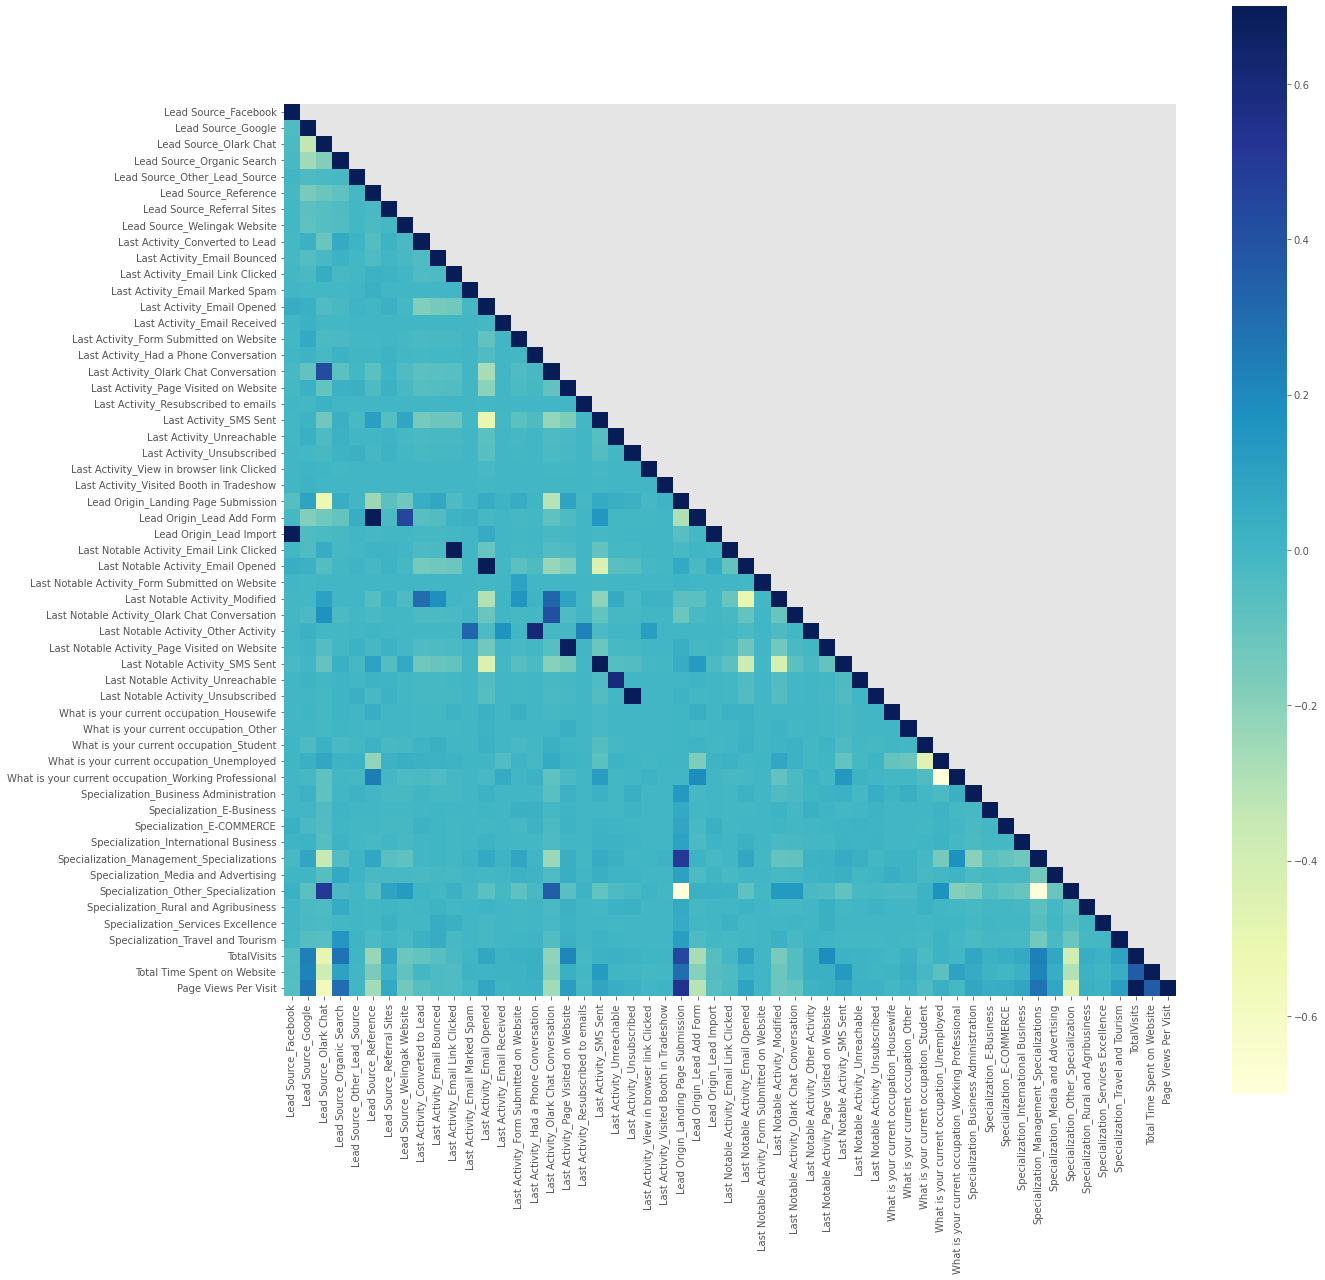

In [77]:
#plotting the heatmap to identify the correlation
plt.figure(figsize=(20,20))

lead_corr = np.array(lead_df.corr())
lead_corr[np.tril_indices_from(lead_corr)] = False
sns.heatmap(lead_df.corr(), mask=lead_corr, vmax=.7,vmin=-.7, square=True, cmap = "YlGnBu");  #removed annot=True for bettter view


**Findings**

 From the above heatmap it is observed that some pairs having high correlations like:
 - Lead_Source_Reference and Lead_Origin_Lead_Add_Form
 - Last_Activity_Email_Link_Clicked and Last_Notable_Activity_Email_Link_Clicked
 - Last_Activity_Email opened and Last_Notable_Activity_Email opened
 - Last_Activity_Had a phone conversation and Last_Notable_Activity_Had a phone conversation
 - Last_Activity_Sms sent and Last_Notable_Activity_Email_Sms sent
 - Last_Activity_Unsubscribed and Last_Notable_Activity_Unsubscribed
 - Occupation_Unemployed and Occupation_Other
 
This can be handled during Recursive Function Elimination and while building the model.



####  <div class="alert alert-info"> Test-Train Split

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
# Putting feature variable to X

X = lead_df.drop(['Converted'], axis=1)
X.head()

,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Other_Specialization,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.0,0,0.0
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,5.0,674,2.5
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2.0,1532,2.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1.0,305,1.0
4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,2.0,1428,1.0


In [80]:
# Putting response variable to y

y = lead_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: category
Categories (2, int64): [0, 1]

In [81]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)
print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (6224, 55)
train size y :  (6224,)
test size X :  (2668, 55)
test size y :  (2668,)


####  <div class="alert alert-info">Rescaling the features with MinMax Scaling

In [82]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Other_Specialization,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,TotalVisits,Total Time Spent on Website,Page Views Per Visit
1667,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.2500,0.513644,0.16625
4887,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.1875,0.201585,0.37500
3181,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.3750,0.117958,0.75000
8124,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0.3750,0.199384,0.75000
7110,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.1250,0.095511,0.25000


In [83]:
### Checking the Conversion Rate percentage

converted = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
converted

37.97795771479982

So our conversion rate is 38%

####  <div class="alert alert-info"> Correlation between different numerical variables

In [84]:
# Correlation between different numerical variables for both the Converted and not-converted cases
conv_corr = lead_df.corr()

# Unstacking the correlation matrix to find out top correlations
conv_corr_unstacked = conv_corr.unstack().sort_values(kind="quicksort")
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Lead Source_Facebook                    Lead Origin_Lead Import                          0.967629
Last Activity_Unsubscribed              Last Notable Activity_Unsubscribed               0.874902
Last Activity_Email Opened              Last Notable Activity_Email Opened               0.861664
Last Activity_SMS Sent                  Last Notable Activity_SMS Sent                   0.853650
Lead Source_Reference                   Lead Origin_Lead Add Form                        0.844957
Last Activity_Email Link Clicked        Last Notable Activity_Email Link Clicked         0.798122
TotalVisits                             Page Views Per Visit                             0.723868
Last Activity_Page Visited on Website   Last Notable Activity_Page Visited on Website    0.680723
Last Activity_Had a Phone Conversation  Last Notable Activity_Other Activity             0.607849
Last Activity_Unreachable               Last Notable Activity_Unreachable                0.598521
dtype: float64

In [85]:
# Dropping highly correlated features

X_test = X_test.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], 1)
X_train = X_train.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], 1)

In [86]:
conv_corr = X_train.corr()

In [87]:
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Lead Source_Reference                   Lead Origin_Lead Add Form                        0.840250
TotalVisits                             Page Views Per Visit                             0.717726
Last Activity_Had a Phone Conversation  Last Notable Activity_Other Activity             0.647337
Lead Origin_Landing Page Submission     Page Views Per Visit                             0.545157
Lead Source_Olark Chat                  Specialization_Other_Specialization              0.513120
Lead Origin_Landing Page Submission     Specialization_Management_Specializations        0.507523
Lead Source_Welingak Website            Lead Origin_Lead Add Form                        0.464097
Lead Origin_Landing Page Submission     TotalVisits                                      0.432751
Lead Source_Olark Chat                  Last Activity_Olark Chat Conversation            0.427605
Last Activity_Olark Chat Conversation   Last Notable Activity_Olark Chat Conversation    0.416431
dtype: float64

####  <div class="alert alert-info"> Model Building

In [88]:
import statsmodels.api as sm

In [89]:
lead_df

,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Other_Specialization,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0,0.00
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,5.0,674,2.50
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,2.0,1532,2.00
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1.0,305,1.00
4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,2.0,1428,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,8.0,1845,2.67
9236,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2.0,238,2.00
9237,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,2.0,199,2.00
9238,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,3.0,499,3.00


In [90]:
# Logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6224
Model:                            GLM   Df Residuals:                     6177
Model Family:                Binomial   Df Model:                           46
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 10 May 2022   Deviance:                   1.5925e+05
Time:                        00:47:56   Pearson chi2:                 7.79e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 6.395e+15   4.64e+07   1.38e+08      0.000    6.39e+15    6.39e+15
Lead Source_Google                                    7.737e+13   2.42e+06    3.2e+07      0.000    7.74e+13    7.74e+13
Lead Source_Olark Chat                                5.283e+14   3.87e+06   1.37e+08      0.000    5.28e+14    5.28e+14
Lead Source_Organic Search                            1.185e+14   3.27e+06   3.62e+07      0.000    1.18e+14    1.18e+14
Lead Source_Other_Lead_Source                        -3.225e+14   1.71e+07  -1.89e+07      0.000   -3.22e+14   -3.22e+14
Lead Source_Reference                                -3.708e+14   1.52e+07  -2.44e+07      0.000   -3.71e+14   -3.71e+14
Lead Source_Referral Sites                            4.677e+13   7.98e+06   5.86e+06      0.000    4.68e+13    4.68e+13
Lead Source_Welingak Website                          6.344e+14   1.61e+07   3.94e+07      0.000    6.34e+14    6.34e+14
Last Activity_Converted to Lead                      -4.404e+15   3.47e+07  -1.27e+08      0.000    -4.4e+15    -4.4e+15
Last Activity_Email Bounced                          -5.095e+15   3.48e+07  -1.47e+08      0.000    -5.1e+15    -5.1e+15
Last Activity_Email Link Clicked                     -4.756e+15   3.48e+07  -1.37e+08      0.000   -4.76e+15   -4.76e+15
Last Activity_Email Marked Spam                      -2.878e+15   6.25e+07   -4.6e+07      0.000   -2.88e+15   -2.88e+15
Last Activity_Email Opened                           -4.529e+15   3.45e+07  -1.31e+08      0.000   -4.53e+15   -4.53e+15
Last Activity_Email Received                         -2.542e+14   7.55e+07  -3.36e+06      0.000   -2.54e+14   -2.54e+14
Last Activity_Form Submitted on Website              -4.704e+15   3.52e+07  -1.34e+08      0.000    -4.7e+15    -4.7e+15
Last Activity_Had a Phone Conversation               -3.459e+15   3.87e+07  -8.93e+07      0.000   -3.46e+15   -3.46e+15
Last Activity_Olark Chat Conversation                -4.763e+15   3.46e+07  -1.38e+08      0.000   -4.76e+15   -4.76e+15
Last Activity_Page Visited on Website                 -4.89e+15   3.46e+07  -1.41e+08      0.000   -4.89e+15   -4.89e+15
Last Activity_Resubscribed to emails                 -7.354e+15   7.85e+07  -9.37e+07      0.000   -7.35e+15   -7.35e+15
Last Activity_SMS Sent                               -3.721e+15   3.45e+07  -1.08e+08      0.000   -3.72e+15   -3.72e+15
Last Activity_Unreachable                            -4.517e+15   3.57e+07  -1.27e+08      0.000   -4.52e+15   -4.52e+15
Last Activity_Unsubscribed                            -4.85e+15   3.64e+07  -1.33e+08      0.000   -4.85e+15   -4.85e+15
Last Activity_View in browser link Clicked           -8.32

####  <div class="alert alert-info"> Feature Selection Using RFE

In [91]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [92]:
from sklearn.feature_selection import RFE

# running RFE with 15 variables as output

rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, y_train)

In [93]:
rfe.support_

array([False,  True, False, False, False, False,  True, False,  True,
       False, False, False, False, False,  True,  True, False, False,
        True, False, False, False, False,  True,  True, False, False,
       False, False,  True, False, False,  True,  True,  True, False,
       False, False, False, False, False,  True, False, False, False,
        True,  True, False])

In [94]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Source_Google', False, 15),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 17),
 ('Lead Source_Other_Lead_Source', False, 28),
 ('Lead Source_Reference', False, 12),
 ('Lead Source_Referral Sites', False, 29),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 11),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 9),
 ('Last Activity_Email Marked Spam', False, 27),
 ('Last Activity_Email Opened', False, 24),
 ('Last Activity_Email Received', False, 25),
 ('Last Activity_Form Submitted on Website', False, 8),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 7),
 ('Last Activity_Resubscribed to emails', False, 10),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 3),
 ('Last Activity_Unsubscribed', False, 26),
 ('Last Activity_View in browser 

In [95]:
# variables shortlisted by RFE

col = X_train.columns[rfe.support_]
col

Index(['Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Last Notable Activity_Other Activity',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Specialization_Other_Specialization', 'TotalVisits',
       'Total Time Spent on Website'],
      dtype='object')

### Model-1

##### Assessing the model with StatsModels

In [96]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6224
Model:                            GLM   Df Residuals:                     6208
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2667.4
Date:                Tue, 10 May 2022   Deviance:                       5334.8
Time:                        00:47:58   Pearson chi2:                 6.49e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3461      0.598     -0.579      0.563      -1.517       0.825
Lead Source_Olark Chat                                   1.4454      0.132     10.911      0.000       1.186       1.705
Lead Source_Welingak Website                             2.5710      0.757      3.396      0.001       1.087       4.055
Last Activity_Email Bounced                             -1.7689      0.338     -5.232      0.000      -2.432      -1.106
Last Activity_Had a Phone Conversation                   0.9355      0.969      0.966      0.334      -0.963       2.834
Last Activity_Olark Chat Conversation                   -1.5707      0.174     -9.053      0.000      -1.911      -1.231
Last Activity_SMS Sent                                   1.2368      0.074     16.776      0.000       1.092       1.381
Lead Origin_Landing Page Submission                     -1.0439      0.128     -8.132      0.000      -1.296      -0.792
Lead Origin_Lead Add Form                                3.4332      0.232     14.782      0.000       2.978       3.888
Last Notable Activity_Other Activity                    23.2309   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
What is your current occupation_Student                 -1.1110      0.626     -1.776      0.076      -2.337       0.115
What is your current occupation_Unemployed              -1.4439      0.584     -2.474      0.013      -2.588      -0.300
What is your current occupation_Working Professional     1.2404      0.610      2.032      0.042       0.044       2.437
Specialization_Other_Specialization                     -0.9927      0.125     -7.952      0.000      -1.237      -0.748
TotalVisits                                              1.3806      0.238      5.810      0.000       0.915       1.846
Total Time Spent on Website                              4.3856      0.164     26.699      0.000       4.064       4.708
========================================================================================================================
"""

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,16.53
6,Lead Origin_Landing Page Submission,7.34
12,Specialization_Other_Specialization,4.76
13,TotalVisits,3.51
0,Lead Source_Olark Chat,2.64
14,Total Time Spent on Website,2.36
11,What is your current occupation_Working Profes...,2.18
7,Lead Origin_Lead Add Form,2.15
3,Last Activity_Had a Phone Conversation,1.73
8,Last Notable Activity_Other Activity,1.73


In [98]:
#drop the most insignificant variable
col = col.drop('What is your current occupation_Unemployed',1)

### Model-2

In [99]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6224
Model:                            GLM   Df Residuals:                     6209
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2670.8
Date:                Tue, 10 May 2022   Deviance:                       5341.7
Time:                        00:47:58   Pearson chi2:                 6.49e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7721      0.151    -11.756      0.000      -2.068      -1.477
Lead Source_Olark Chat                                   1.4471      0.132     10.928      0.000       1.188       1.707
Lead Source_Welingak Website                             2.5651      0.757      3.389      0.001       1.081       4.049
Last Activity_Email Bounced                             -1.7766      0.338     -5.255      0.000      -2.439      -1.114
Last Activity_Had a Phone Conversation                   0.9269      0.969      0.956      0.339      -0.973       2.827
Last Activity_Olark Chat Conversation                   -1.5713      0.173     -9.060      0.000      -1.911      -1.231
Last Activity_SMS Sent                                   1.2288      0.074     16.685      0.000       1.084       1.373
Lead Origin_Landing Page Submission                     -1.0560      0.128     -8.234      0.000      -1.307      -0.805
Lead Origin_Lead Add Form                                3.4396      0.232     14.823      0.000       2.985       3.894
Last Notable Activity_Other Activity                    23.2272   1.69e+04      0.001      0.999    -3.3e+04    3.31e+04
What is your current occupation_Student                  0.3256      0.232      1.403      0.161      -0.129       0.781
What is your current occupation_Working Professional     2.6762      0.189     14.196      0.000       2.307       3.046
Specialization_Other_Specialization                     -1.0084      0.125     -8.079      0.000      -1.253      -0.764
TotalVisits                                              1.3837      0.238      5.825      0.000       0.918       1.849
Total Time Spent on Website                              4.3955      0.164     26.780      0.000       4.074       4.717
========================================================================================================================
"""

In [100]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Lead Origin_Landing Page Submission,2.95
12,TotalVisits,2.90
11,Specialization_Other_Specialization,2.42
13,Total Time Spent on Website,2.16
0,Lead Source_Olark Chat,2.03
3,Last Activity_Had a Phone Conversation,1.73
8,Last Notable Activity_Other Activity,1.73
5,Last Activity_SMS Sent,1.58
7,Lead Origin_Lead Add Form,1.50
4,Last Activity_Olark Chat Conversation,1.48


In [101]:
#drop the most insignificant variable
col = col.drop('Last Notable Activity_Other Activity',1)

### Model-3

In [102]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6224
Model:                            GLM   Df Residuals:                     6210
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2676.4
Date:                Tue, 10 May 2022   Deviance:                       5352.7
Time:                        00:47:58   Pearson chi2:                 6.51e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7729      0.151    -11.768      0.000      -2.068      -1.478
Lead Source_Olark Chat                                   1.4570      0.132     11.007      0.000       1.198       1.716
Lead Source_Welingak Website                             2.5626      0.757      3.385      0.001       1.079       4.046
Last Activity_Email Bounced                             -1.7790      0.338     -5.262      0.000      -2.442      -1.116
Last Activity_Had a Phone Conversation                   2.4319      0.719      3.380      0.001       1.022       3.842
Last Activity_Olark Chat Conversation                   -1.5757      0.173     -9.086      0.000      -1.916      -1.236
Last Activity_SMS Sent                                   1.2260      0.074     16.654      0.000       1.082       1.370
Lead Origin_Landing Page Submission                     -1.0542      0.128     -8.230      0.000      -1.305      -0.803
Lead Origin_Lead Add Form                                3.4472      0.232     14.859      0.000       2.993       3.902
What is your current occupation_Student                  0.3231      0.232      1.392      0.164      -0.132       0.778
What is your current occupation_Working Professional     2.6741      0.189     14.185      0.000       2.305       3.044
Specialization_Other_Specialization                     -1.0114      0.125     -8.107      0.000      -1.256      -0.767
TotalVisits                                              1.3907      0.237      5.858      0.000       0.925       1.856
Total Time Spent on Website                              4.3967      0.164     26.814      0.000       4.075       4.718
========================================================================================================================
"""

In [103]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Lead Origin_Landing Page Submission,2.95
11,TotalVisits,2.90
10,Specialization_Other_Specialization,2.42
12,Total Time Spent on Website,2.15
0,Lead Source_Olark Chat,2.03
5,Last Activity_SMS Sent,1.58
7,Lead Origin_Lead Add Form,1.50
4,Last Activity_Olark Chat Conversation,1.48
1,Lead Source_Welingak Website,1.35
9,What is your current occupation_Working Profes...,1.20


In [104]:
#drop the most insignificant variable
col = col.drop('What is your current occupation_Student',1)

### Model-4

In [105]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6224
Model:                            GLM   Df Residuals:                     6211
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2677.3
Date:                Tue, 10 May 2022   Deviance:                       5354.6
Time:                        00:47:58   Pearson chi2:                 6.50e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7683      0.151    -11.742      0.000      -2.064      -1.473
Lead Source_Olark Chat                                   1.4614      0.132     11.044      0.000       1.202       1.721
Lead Source_Welingak Website                             2.5529      0.757      3.373      0.001       1.070       4.036
Last Activity_Email Bounced                             -1.7762      0.338     -5.251      0.000      -2.439      -1.113
Last Activity_Had a Phone Conversation                   2.4247      0.719      3.371      0.001       1.015       3.835
Last Activity_Olark Chat Conversation                   -1.5691      0.173     -9.058      0.000      -1.909      -1.230
Last Activity_SMS Sent                                   1.2222      0.074     16.620      0.000       1.078       1.366
Lead Origin_Landing Page Submission                     -1.0512      0.128     -8.206      0.000      -1.302      -0.800
Lead Origin_Lead Add Form                                3.4539      0.232     14.892      0.000       2.999       3.908
What is your current occupation_Working Professional     2.6667      0.188     14.154      0.000       2.297       3.036
Specialization_Other_Specialization                     -1.0106      0.125     -8.096      0.000      -1.255      -0.766
TotalVisits                                              1.3906      0.237      5.860      0.000       0.925       1.856
Total Time Spent on Website                              4.3994      0.164     26.831      0.000       4.078       4.721
========================================================================================================================
"""

In [106]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Lead Origin_Landing Page Submission,2.93
10,TotalVisits,2.90
9,Specialization_Other_Specialization,2.41
11,Total Time Spent on Website,2.15
0,Lead Source_Olark Chat,2.03
5,Last Activity_SMS Sent,1.58
7,Lead Origin_Lead Add Form,1.50
4,Last Activity_Olark Chat Conversation,1.48
1,Lead Source_Welingak Website,1.35
8,What is your current occupation_Working Profes...,1.19


### <div class="alert alert-success">  All variables have a good value of VIF and p-values. So we need not drop any more variables and we can proceed with making predictions using this model only

In [107]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1667    0.698269
4887    0.158163
3181    0.364247
8124    0.450476
7110    0.101113
8681    0.869563
4380    0.132333
6083    0.052815
7374    0.408225
1196    0.160728
dtype: float64

In [108]:
# Reshape

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.6982695 , 0.15816287, 0.36424712, 0.45047557, 0.10111327,
       0.86956325, 0.13233292, 0.05281496, 0.40822486, 0.16072819])

In [109]:
#Creating a dataframe with the true convertion status and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,1,0.698269,1667
1,0,0.158163,4887
2,0,0.364247,3181
3,0,0.450476,8124
4,0,0.101113,7110


In [110]:
## Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,1,0.698269,1667,1
1,0,0.158163,4887,0
2,0,0.364247,3181,0
3,0,0.450476,8124,0
4,0,0.101113,7110,0


####  <div class="alert alert-info"> Confusion Matrics and Accuracy Score

In [111]:
from sklearn import metrics

In [112]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3417  433]
 [ 820 1554]]


In [113]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7986825192802056


- Accuracy rate is around 79.86% which is good. 
- However we need to calculate other metrics as we cannot depend only on accuracy.

Metrics Beyond Simple Accuracy

In [114]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
sensitivity = TP/(FN + TP)
specificity = TN/(FP + TN)
falsePositiveRate = FP/(FP + TN)
positivePredictivePower = TP/(TP +FP )
negativePredictivePower = TN/(TN + FN)
print('sensitivity / Recall: ', round(100*sensitivity,3),'%')
print('specificity : ',  round(100*specificity,3),'%')
print('False Positive Rate : ',  round(100*falsePositiveRate,3),'%')
print('Precision / Positive Predictive Power : ',  round(100*positivePredictivePower,3),'%')
print('Negative Predictive Power : ',  round(100*negativePredictivePower,3),'%')

sensitivity / Recall:  65.459 %
specificity :  88.753 %
False Positive Rate :  11.247 %
Precision / Positive Predictive Power :  78.208 %
Negative Predictive Power :  80.647 %


####  <div class="alert alert-info">  Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

#### Here, our goal is to have achieve good sensitivity score

In [115]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [116]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

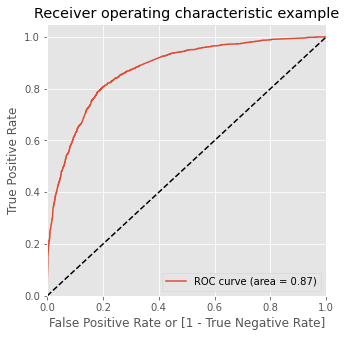

In [117]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### <div class="alert alert-info">  Finding Optimal Cutoff Point

Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [118]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.698269,1667,1,1,1,1,1,1,1,1,0,0,0
1,0,0.158163,4887,0,1,1,0,0,0,0,0,0,0,0
2,0,0.364247,3181,0,1,1,1,1,0,0,0,0,0,0
3,0,0.450476,8124,0,1,1,1,1,1,0,0,0,0,0
4,0,0.101113,7110,0,1,1,0,0,0,0,0,0,0,0


In [119]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability_score','accuracy_score','sensitivity_score','specificity_score'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability_score  accuracy_score  sensitivity_score  specificity_score
0.0                0.0        0.381427           1.000000           0.000000
0.1                0.1        0.582744           0.973041           0.342078
0.2                0.2        0.711600           0.927127           0.578701
0.3                0.3        0.791131           0.831508           0.766234
0.4                0.4        0.806073           0.766639           0.830390
0.5                0.5        0.798683           0.654591           0.887532
0.6                0.6        0.787757           0.577928           0.917143
0.7                0.7        0.770566           0.485678           0.946234
0.8                0.8        0.747751           0.388374           0.969351
0.9                0.9        0.702442           0.235046           0.990649


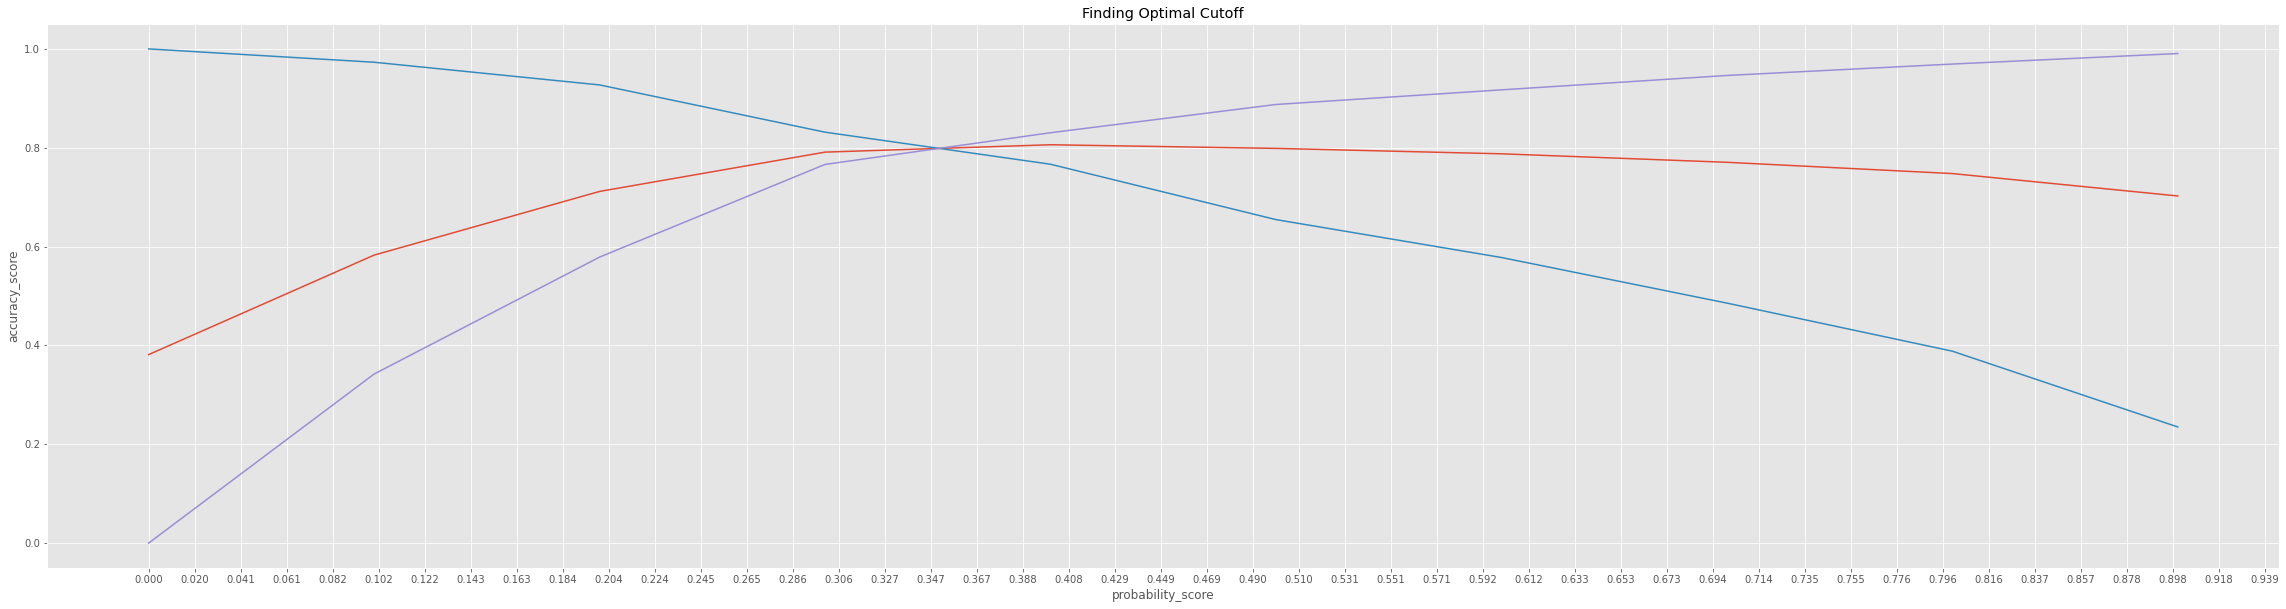

In [120]:
#Let's plot accuracy sensitivity and specificity for various probabilities.
fig,ax = plt.subplots()
fig.set_figwidth(40)
fig.set_figheight(10)
plots=['accuracy_score','sensitivity_score','specificity_score']
ax.set_xticks(np.linspace(0,1,50))
ax.set_title('Finding Optimal Cutoff')
sns.lineplot(x='probability_score',y=plots[0] , data=cutoff_df,ax=ax)
sns.lineplot(x='probability_score',y=plots[1] , data=cutoff_df,ax=ax)
sns.lineplot(x='probability_score',y=plots[2] , data=cutoff_df,ax=ax)
plt.show()

#### <div class="alert alert-info">  From the curve above, 0.34 is the optimum point to take it as a cutoff probability.

In [121]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.698269,1667,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.158163,4887,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.364247,3181,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.450476,8124,0,1,1,1,1,1,0,0,0,0,0,1
4,0,0.101113,7110,0,1,1,0,0,0,0,0,0,0,0,0


In [122]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8020565552699229

In [123]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3076,  774],
       [ 458, 1916]], dtype=int64)

In [124]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
sensitivity = TP/(FN + TP)
specificity = TN/(FP + TN)
falsePositiveRate = FP/(FP + TN)
positivePredictivePower = TP/(TP +FP )
negativePredictivePower = TN/(TN + FN)
print('sensitivity / Recall: ', round(100*sensitivity,3),'%')
print('specificity : ',  round(100*specificity,3),'%')
print('False Positive Rate : ',  round(100*falsePositiveRate,3),'%')
print('Precision / Positive Predictive Power : ',  round(100*positivePredictivePower,3),'%')
print('Negative Predictive Power : ',  round(100*negativePredictivePower,3),'%')

sensitivity / Recall:  80.708 %
specificity :  79.896 %
False Positive Rate :  20.104 %
Precision / Positive Predictive Power :  71.227 %
Negative Predictive Power :  87.04 %


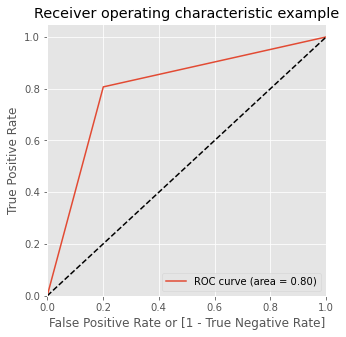

In [125]:
## ROC curve for cut off probability of 0.34
draw_roc(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

## Precision and Recall

In [126]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3417,  433],
       [ 820, 1554]], dtype=int64)

Precision :TP / TP + FP<br/>
Recall :TP / TP + FN

In [127]:
print('Precision :', confusion[1,1]/(confusion[0,1]+confusion[1,1]))
print('Recall :', confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Precision : 0.782083543029693
Recall : 0.6545914069081719


In [128]:
#Doing the same using the sklearn.
from sklearn.metrics import precision_score, recall_score
print('Precision : ', precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
print('Recall :', recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Precision :  0.782083543029693
Recall : 0.6545914069081719


####  Precision and Recall Tradeoff

In [129]:
from sklearn.metrics import precision_score, recall_score

In [130]:
precision_score

<function sklearn.metrics._classification.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

In [131]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.782083543029693

In [132]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6545914069081719

In [133]:
from sklearn.metrics import precision_recall_curve

In [134]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6219    1
 6220    0
 6221    0
 6222    1
 6223    1
 Name: Converted, Length: 6224, dtype: category
 Categories (2, int64): [0, 1],
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6219    0
 6220    0
 6221    0
 6222    1
 6223    1
 Name: predicted, Length: 6224, dtype: int64)

In [135]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

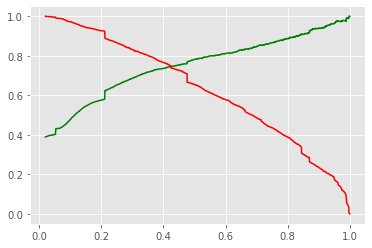

In [136]:
    plt.plot(thresholds, p[:-1], "g-")
    plt.plot(thresholds, r[:-1], "r-")
    plt.show()

#### Making predictions on the test set

In [137]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [138]:
X_test = X_test[col]
X_test.head()

,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,Specialization_Other_Specialization,TotalVisits,Total Time Spent on Website
5536,1,0,0,0,0,1,0,0,0,1,0.0000,0.000000
3563,0,0,0,0,0,1,1,0,0,0,0.1250,0.308979
5357,0,0,0,0,0,0,1,0,0,0,0.1250,0.498680
1763,0,0,0,0,1,0,0,0,0,1,0.1875,0.119278
1496,0,0,0,0,0,0,1,0,0,0,0.3125,0.170335


In [139]:
X_test_sm = sm.add_constant(X_test)

In [140]:
y_test_pred = res.predict(X_test_sm)

In [141]:
y_test_pred[:10]

5536    0.476163
3563    0.483943
5357    0.388926
1763    0.027584
1496    0.163063
9236    0.276333
3600    0.286727
2886    0.708515
6518    0.261115
6782    0.158015
dtype: float64

In [142]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
5536,0.476163
3563,0.483943
5357,0.388926
1763,0.027584
1496,0.163063


In [143]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [144]:
# Putting LeadId to index
y_test_df['LeadId'] = y_test_df.index

In [145]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [146]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [147]:
y_pred_final.head()

,Converted,LeadId,0
0,1,5536,0.476163
1,1,3563,0.483943
2,0,5357,0.388926
3,0,1763,0.027584
4,0,1496,0.163063


In [148]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [149]:
y_pred_final.head()

,Converted,LeadId,Converted_Prob
0,1,5536,0.476163
1,1,3563,0.483943
2,0,5357,0.388926
3,0,1763,0.027584
4,0,1496,0.163063


In [150]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.34%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.34 else 0)

In [151]:
y_pred_final.head()

,Converted,LeadId,Converted_Prob,final_predicted
0,1,5536,0.476163,1
1,1,3563,0.483943,1
2,0,5357,0.388926,1
3,0,1763,0.027584,0
4,0,1496,0.163063,0


In [152]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,Converted,LeadId,Converted_Prob,final_predicted,lead_score
0,1,5536,0.476163,1,48
1,1,3563,0.483943,1,48
2,0,5357,0.388926,1,39
3,0,1763,0.027584,0,3
4,0,1496,0.163063,0,16
5,0,9236,0.276333,0,28
6,0,3600,0.286727,0,29
7,1,2886,0.708515,1,71
8,0,6518,0.261115,0,26
9,0,6782,0.158015,0,16


In [153]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    818
0    185
Name: final_predicted, dtype: int64

In [154]:
# check the precentage of final_predicted conversions on test data

818/float(818+185)

0.8155533399800599

In [155]:
# Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8144677661169415

**Confusion Matrix**

In [156]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1355,  310],
       [ 185,  818]], dtype=int64)

In [157]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

**Accuracy**

In [158]:
print('Accuracy on Test set : ', round(100*(TP + TN)/(TP + TN + FP + FN),3),'%')

Accuracy on Test set :  81.447 %


In [159]:
#Metrics Beyond Simple Accuracy
sensitivity = TP/(FN + TP)
specificity = TN/(FP + TN)
falsePositiveRate = FP/(FP + TN)
positivePredictivePower = TP/(TP +FP )
negativePredictivePower = TN/(TN + FN)
print('sensitivity / Recall: ', round(100*sensitivity,3),'%')
print('specificity : ',  round(100*specificity,3),'%')
print('False Positive Rate : ',  round(100*falsePositiveRate,3),'%')
print('Precision / Positive Predictive Power : ',  round(100*positivePredictivePower,3),'%')
print('Negative Predictive Power : ',  round(100*negativePredictivePower,3),'%')

sensitivity / Recall:  81.555 %
specificity :  81.381 %
False Positive Rate :  18.619 %
Precision / Positive Predictive Power :  72.518 %
Negative Predictive Power :  87.987 %


#### <div class="alert alert-info"> Precision and Recall Score

In [160]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.725177304964539
recall  0.8155533399800599


#### <div class="alert alert-info"> Precision and Recall Trade off

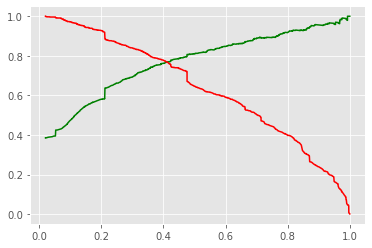

In [161]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [162]:
print("Features used in Final Model :", col)

print("-----------------------Feature Importance--------------------")
print(res.params)

Features used in Final Model : Index(['Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Specialization_Other_Specialization', 'TotalVisits',
       'Total Time Spent on Website'],
      dtype='object')
-----------------------Feature Importance--------------------
const                                                  -1.768327
Lead Source_Olark Chat                                  1.461363
Lead Source_Welingak Website                            2.552867
Last Activity_Email Bounced                            -1.776209
Last Activity_Had a Phone Conversation                  2.424667
Last Activity_Olark Chat Conversation                  -1.569128
Last Activity_SMS Sent                

### <div class="alert alert-success"> Final Observation:

- Objective was to built the model which shows approx 80% prediction rate.
- A lead score for each lead indicates the chances of lead being converted.
- Higher lead score shows a better chances of being converted.
- The ROC curve has a value of 0.87, which is  good.
- We have calculated the following values for the Train Data and for test data:
    
Train Data:
    
    - Accuracy : 79.86%
    - Sensitivity : 65.45%
    - Specificity : 88.75%
    
Test Data:
    
    - Accuracy : 81.44%
    - Sensitivity : 81.55%
    - Specificity : 81.38%
    
- The final model has Precision of 0.72, this means 72% of predicted hot leads are True Hot Leads.
    
- The model seems to be performing well.
    
- Can recommend this model in making good calls based on this model.